In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

(-2.05, 2.05)

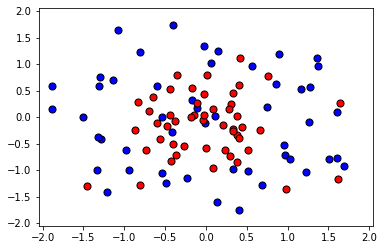

In [29]:
data = pd.read_csv('data/grid.csv',header=None)
X = data[[0,1]]
y = data[2]
#print(y)
X_blue = data[data[2]== 0]
X_red = data[data[2]== 1]
plt.scatter(X_blue[0],X_blue[1],c='blue',edgecolor='k',s=50)
plt.scatter(X_red[0],X_red[1],c='red',edgecolor='k',s=50)
plt.xlim(-2.05,2.05)
plt.ylim(-2.05,2.05)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, make_scorer

import random
random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_test)

           0         1
83  0.279140  0.148069
53 -0.436063  0.043680
70 -1.888875  0.144099
45  1.262501 -0.088046
44 -0.402951  1.743953
39  0.863118  0.626453
22  0.435218 -0.192221
80  0.381957  0.012414
10 -0.145507  0.036546
0   0.336494 -0.985951
18  0.655535 -0.244533
30  0.381259 -0.852947
73  0.520333 -0.621854
33 -0.650474  0.377282
90  0.417765  1.114234
4   1.221923 -1.039399
76  0.956067 -0.533023
77  0.288867 -0.725156
12  1.603560  0.090814
31  0.404871 -0.385646


In [69]:
#
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)

train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)
print(clf.get_params())

{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 42, 'splitter': 'best'}


In [51]:
def plot_model(X, y, clf):
    plt.scatter(X_blue[0],X_blue[1],c='blue',edgecolor='k',s=50)
    plt.scatter(X_red[0],X_red[1],c='red',edgecolor='k',s=50)

    plt.xlim(-2.05,2.05)
    plt.ylim(-2.05,2.05)
    plt.grid(False)
    plt.tick_params(
        axis='x',
        which='both',
        bottom='off',
        top='off')

    r = np.linspace(-2.1,2.1,300)
    s,t = np.meshgrid(r,r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((s,t),1)

    z = clf.predict(h)

    s = s.reshape((np.size(r),np.size(r)))
    t = t.reshape((np.size(r),np.size(r)))
    z = z.reshape((np.size(r),np.size(r)))

    plt.contourf(s,t,z,colors = ['blue','red'],alpha = 0.2,levels = range(-1,2))
    if len(np.unique(z)) > 1:
        plt.contour(s,t,z,colors = 'k', linewidths = 2)
    plt.show()
    



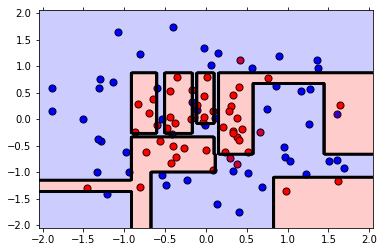

In [52]:
plot_model(X, y, clf)

******************* 100
[64 95 16 60  5  7 44 27 31 38 19 22  2 80 72 35  0 40  6 57 85 36 34 58
 91 10 37 54 50 97 21 30 12 14 93 29 99 25 63 17 88 32 96 52 94 53 43 65
 46 89 66 56 20 51 48 26 55 42 45 82 81 15  9 23 24 61 90 59 73 18 33 13
 67 83 86 74 79 76 84 69 47 77 70 41 49  4 71 28 92 87  1 68 78 39 62 75
  8  3 98 11]


D:\ProgramData\Anaconda3\envs\fupan\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


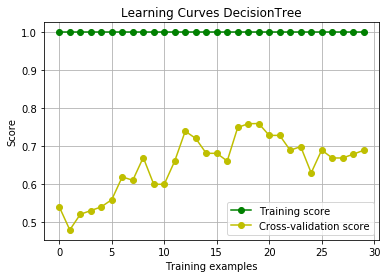

In [68]:
from sklearn.model_selection import learning_curve    
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    print("*******************",Y.shape[0])
    print(permutation)
    
    X2 = np.array(X)[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2

X2, y2 = randomize(X, y)

def draw_learning_curves(X, y, estimator, num_trainings,title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X2, y2, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves "+title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()

draw_learning_curves(X,y,clf,30,'DecisionTree')

In [121]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve
#from sklearn.tree import DecisionTreeRegressor

def ModelComplexity(X, y):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(X.shape[0], test_size = 0.2, random_state = 42)

    # Vary the max_depth parameter from 1 to 10
    max_depth = np.arange(1,11)
    
    scorer = make_scorer(f1_score)

    # Calculate the training and testing scores
    train_scores, test_scores = validation_curve(DecisionTreeClassifier(), X, y, \
        param_name = "max_depth", param_range = max_depth, cv = cv, scoring =scorer)

    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    plt.figure(figsize=(7, 5))
    plt.title('Decision Tree Classifier Complexity Performance')
    plt.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
    plt.fill_between(max_depth, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    plt.fill_between(max_depth, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')
    
    # Visual aesthetics
    plt.legend(loc = 'lower right')
    plt.xlabel('Maximum Depth')
    plt.ylabel('Score')
    plt.ylim([-0.05,1.05])
    plt.show()

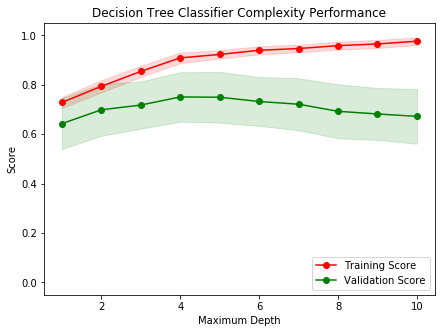

In [122]:
ModelComplexity(X, y)

In [38]:
print('The Training F1 Score is', f1_score(train_predictions, y_train))
print('The Testing F1 Score is', f1_score(test_predictions, y_test))

The Training F1 Score is 1.0
The Testing F1 Score is 0.7000000000000001


D:\ProgramData\Anaconda3\envs\fupan\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\ProgramData\Anaconda3\envs\fupan\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
The training F1 Score is 0.8148148148148148
The testing F1 Score is 0.8


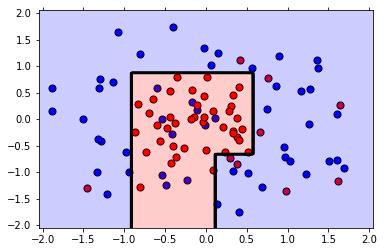

In [42]:
#grid search
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier(random_state=42)
scorer = make_scorer(f1_score)

parameters = {'max_depth':[2,4,6,8,10],'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)
grid_obj.fit(X_train,y_train)

best_clf = grid_obj.best_estimator_
print(grid_obj.best_params_)

best_clf.fit(X_train,y_train)
best_train_predictions = best_clf.predict(X_train)
best_test_predictions = best_clf.predict(X_test)

print('The training F1 Score is', f1_score(best_train_predictions, y_train))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test))
plot_model(X, y, best_clf)

D:\ProgramData\Anaconda3\envs\fupan\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


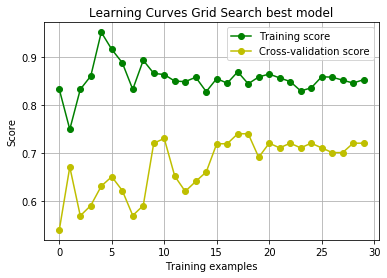

In [67]:
draw_learning_curves(X,y,best_clf,30,'Grid Search best model')


;


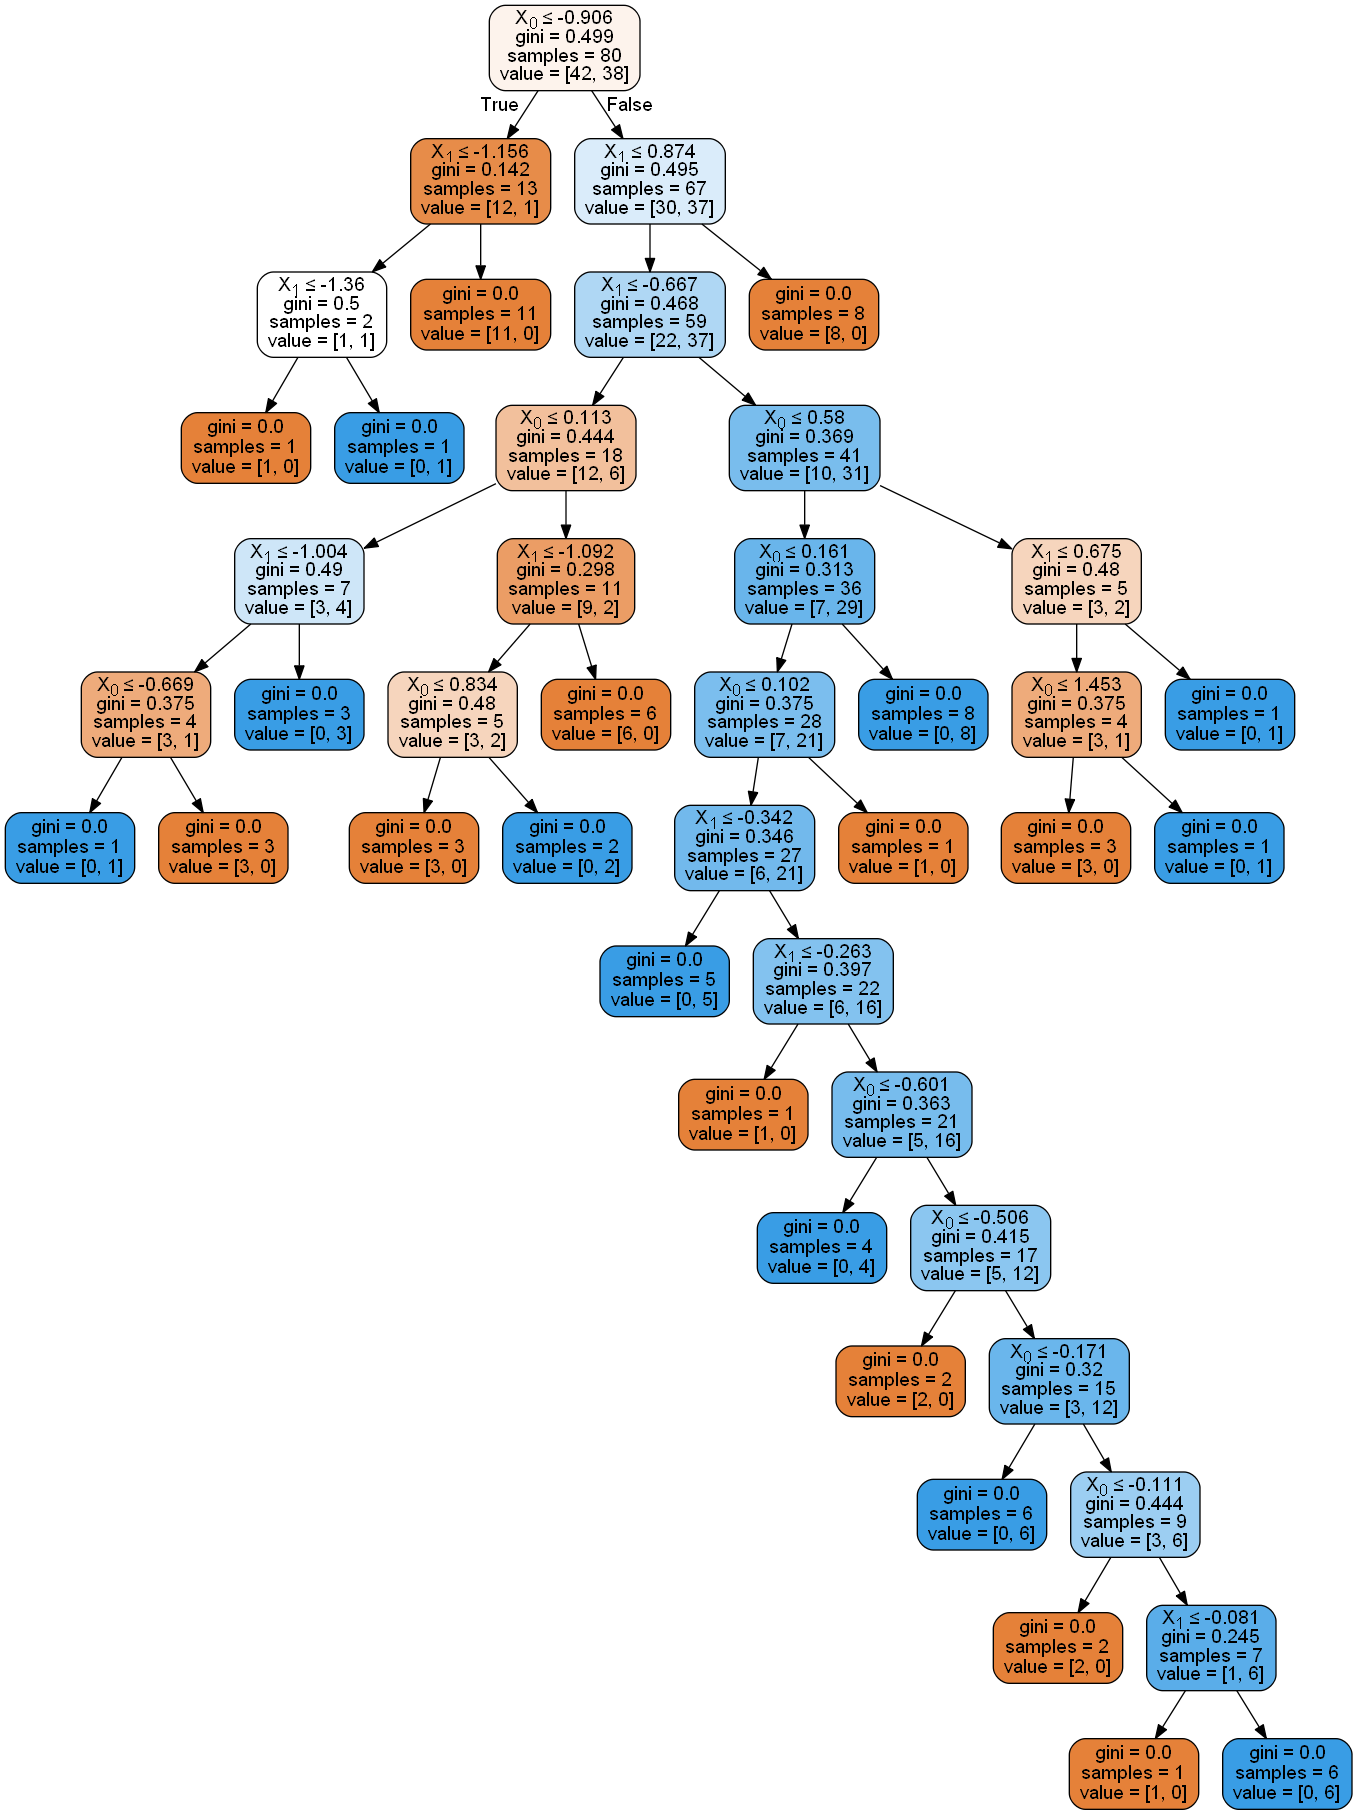

In [86]:
from IPython.display import Image
from sklearn import tree
import pydotplus
import os
print(os.pathsep)
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

dot_data = tree.export_graphviz(clf, out_file=None, 
                           
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
graph
img = Image(graph.create_png())

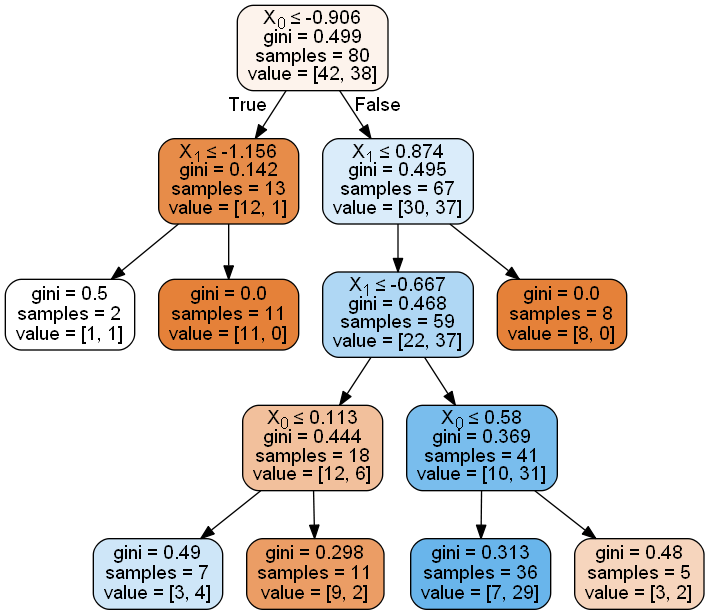

In [89]:
dot_data = tree.export_graphviz(best_clf, out_file=None, 
                           
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
graph
Image(graph.create_png())